I have chosen the mushroom data set from UCI (https://archive.ics.uci.edu/dataset/73/mushroom , accessed/downloaded on 03/10/23). The dataset contains records for poisonous and edible mushrooms in the Agaricus and Lepiota family.
The classification goal is to predict if a mushroom is poisonous or edible based on its physical features and appearance.
The dataset includes information about mushrooms such as cap-hsape, odor and gill-colour. All features in this dataset are categorical as will be shown below. The target variable is named "poisonous", which indicates wether the mushroom is either poisonous or edible (p/n).

**Peer-reviewed paper**

The paper I have chosen to review is "Computer Vision and Machine Learning Applied in the Mushroom Industry," found here: https://www.sciencedirect.com/science/article/pii/S0168169922003325. The impact factor is 8.3.

This paper is about challenges in the mushroom industry. It looks at several issues present and reviews solutions to each of them. One of the issues discussed is the problem of identifying edible and non-edible mushrooms and how the commonly used method of manual labor is very slow and demanding when it comes to identifying mushrooms at a large scale. This is a problem as the mushroom industry is growing quickly and needs to ramp up production, requiring more effective ways in classifying mushrooms. Manually identifying mushrooms also becomes an issue for the public when looking for edible mushrooms in the wild and self-identifying them. Incorrect identification can be very dangerous and sometimes even lead to death.

The paper discusses several technologies used to fix this problem, such as image processing, computer vision, and machine learning. One of the machine learning algorithms used to help solve this problem is CNN or Convolutional Neural Networks. This approach used the 'GrabCut' algorithm, which manages to achieve a 92% accuracy rate with 133 mushroom images as training data. A different approach focused on the issue of spatial redundancy in CNNs and managed to achieve an accuracy of almost 92% with an average processing time totaling less than a second.

Taking these into account, the paper reports on the successful application of machine learning used to categorize mushrooms in the industry. The paper highlights that although the use of these algorithms has shown to be extremely promising, in order to fix all issues in the mushroom industry, there is much more to be done. For example, in order to keep up with demand, it will be necessary for these machine learning algorithms to be paired with automated mushroom picking/harvesting.


In [ ]:
# imports for several required libraries;
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **DATA EXPLORATION:**

In [ ]:
df = pd.read_csv('/content/agaricus-lepiota.data') # imports data set
df.head() # quick overview of data;

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g



Data Exploration:


In [ ]:
print(f'the dataset contains {df.shape[0]} rows and {df.shape[1]} columns') # prints data size

the dataset contains 8123 rows and 23 columns


In [ ]:
df.columns # displays column names;

Index(['p', 'x', 's', 'n', 't', 'p.1', 'f', 'c', 'n.1', 'k', 'e', 'e.1', 's.1',
       's.2', 'w', 'w.1', 'p.2', 'w.2', 'o', 'p.3', 'k.1', 's.3', 'u'],
      dtype='object')

These Feature names are unclear.
This changes the column names to the more meaningfull names shown on the UCI website;


In [ ]:
df.columns = ['poisonous', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing','gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above', 'stalk-surface-below', 'stalk-color-above', 'stalk-color-below', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
df.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below,stalk-color-above,stalk-color-below,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [ ]:
poison = df[df.poisonous=='p'].shape[0] # selects the poisonous mushroom entries from target feature
edible = df[df.poisonous=='e'].shape[0]

print(f'the number of poisonous mushrooms in the data set is {poison}. This is {round(poison/8123*100, 2)}%') # this calculates and prints the percentage of mushrooms thatbare poisonous and edible and shows us the distribution of the target variable.
print(f'the number of edible mushrooms in the data set is {edible}. This is {round(edible/8123*100, 2)}%')


the number of poisonous mushrooms in the data set is 3915. This is 48.2%
the number of edible mushrooms in the data set is 4208. This is 51.8%


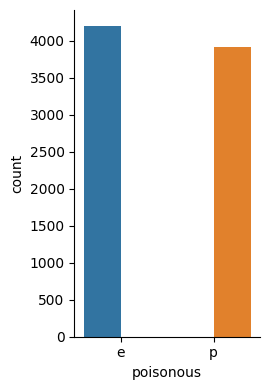

In [ ]:
sns.catplot(x="poisonous", hue="poisonous", data=df, kind="count", height=4, aspect=.7)
plt.show()
# this visualises the distribution of edible/poisonous mushrooms;

This shows that the dataset is well balanced and the target variabvle can be left as it is. This should lead the machine learning algorithm used later on to be unbiased and fair.

In [ ]:
df.info() # this produces a rough idea on the types of data and any null values present.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   poisonous            8123 non-null   object
 1   cap-shape            8123 non-null   object
 2   cap-surface          8123 non-null   object
 3   cap-color            8123 non-null   object
 4   bruises              8123 non-null   object
 5   odor                 8123 non-null   object
 6   gill-attachment      8123 non-null   object
 7   gill-spacing         8123 non-null   object
 8   gill-size            8123 non-null   object
 9   gill-color           8123 non-null   object
 10  stalk-shape          8123 non-null   object
 11  stalk-root           8123 non-null   object
 12  stalk-surface-above  8123 non-null   object
 13  stalk-surface-below  8123 non-null   object
 14  stalk-color-above    8123 non-null   object
 15  stalk-color-below    8123 non-null   object
 16  veil-t

the df.info() output suggests that all data is categorical and has no missing values (the Non-null counts match the number of rows in our dataset). However, this is untrue; missing values are present in the dataset according to the repository page.

In [ ]:
#check for unique values in each column and print what they are
for i in df.columns:
  if len(df[i].unique())<15:
    print(f'{i} has {len(df[i].unique())} unique values, these are: {df[i].unique()}')

poisonous has 2 unique values, these are: ['e' 'p']
cap-shape has 6 unique values, these are: ['x' 'b' 's' 'f' 'k' 'c']
cap-surface has 4 unique values, these are: ['s' 'y' 'f' 'g']
cap-color has 10 unique values, these are: ['y' 'w' 'g' 'n' 'e' 'p' 'b' 'u' 'c' 'r']
bruises has 2 unique values, these are: ['t' 'f']
odor has 9 unique values, these are: ['a' 'l' 'p' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment has 2 unique values, these are: ['f' 'a']
gill-spacing has 2 unique values, these are: ['c' 'w']
gill-size has 2 unique values, these are: ['b' 'n']
gill-color has 12 unique values, these are: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape has 2 unique values, these are: ['e' 't']
stalk-root has 5 unique values, these are: ['c' 'e' 'b' 'r' '?']
stalk-surface-above has 4 unique values, these are: ['s' 'f' 'k' 'y']
stalk-surface-below has 4 unique values, these are: ['s' 'f' 'y' 'k']
stalk-color-above has 9 unique values, these are: ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
st

this shows us already that the "veil-type" feature can be dropped as all mushrooms fall into one value in its case.
It is also possible to see that the "stalk-root" feature has missing values, represented with a "?". This corresponds with the dataset information on the UCI website.
A pie chart will help to determine how much of the data is missing;

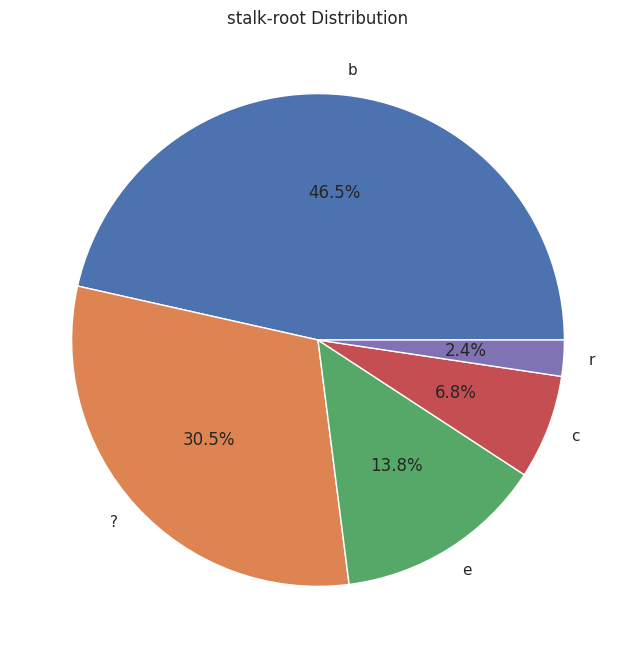

In [ ]:
plt.figure(figsize=(8, 8))
df["stalk-root"].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("stalk-root Distribution")
plt.ylabel('')
plt.show()


30.5% of the stalk-root feature is made up of null values. This is quite  high and so this feature may need to be dropped.

Another way to determine if any other variables need to be dropped is by looping throiugh the dataset and creating bar charts for each feature. The charts will show us the distribution of poisonous and edible mushrooms for each unique value found in the feature.

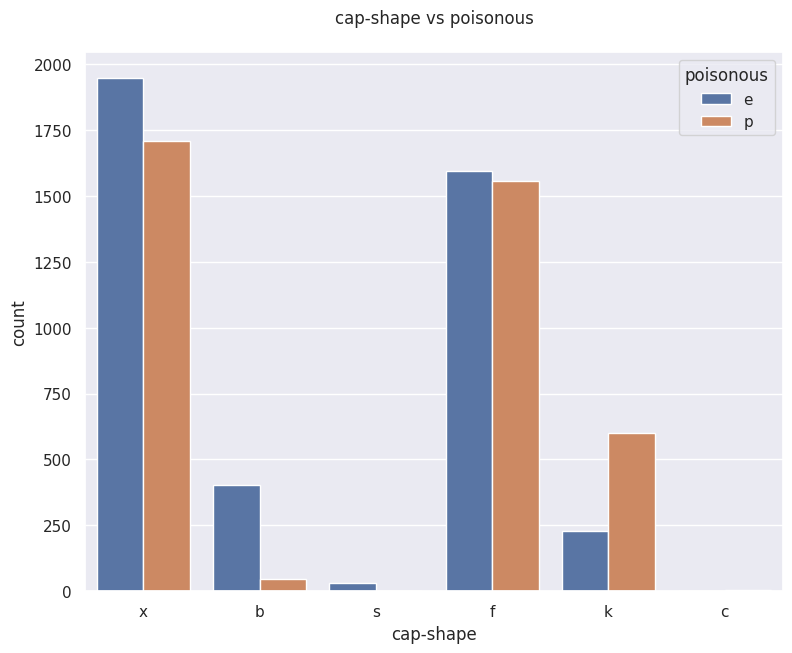

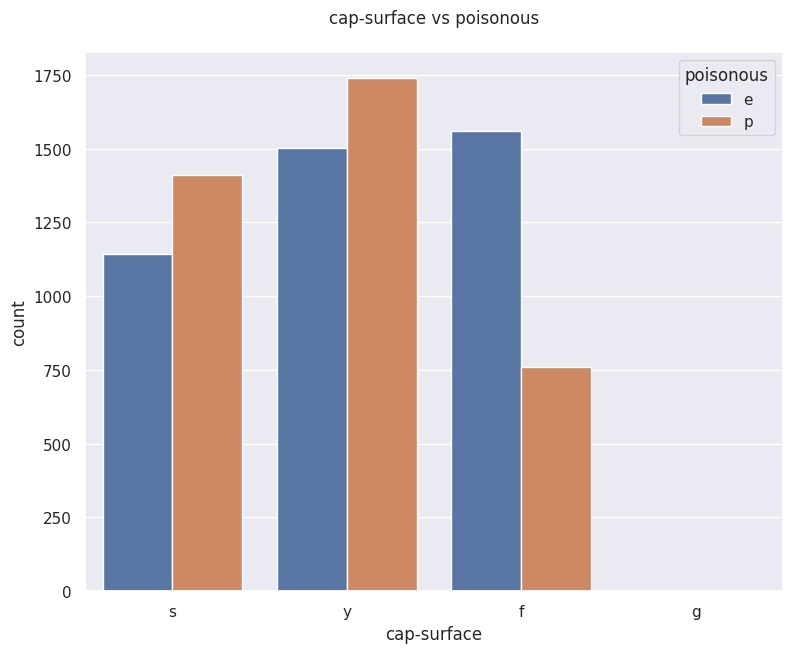

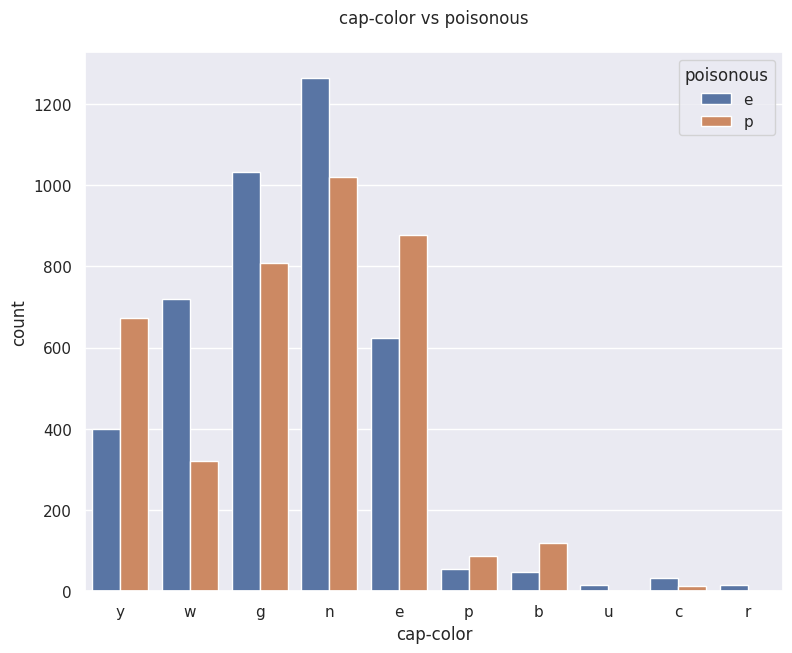

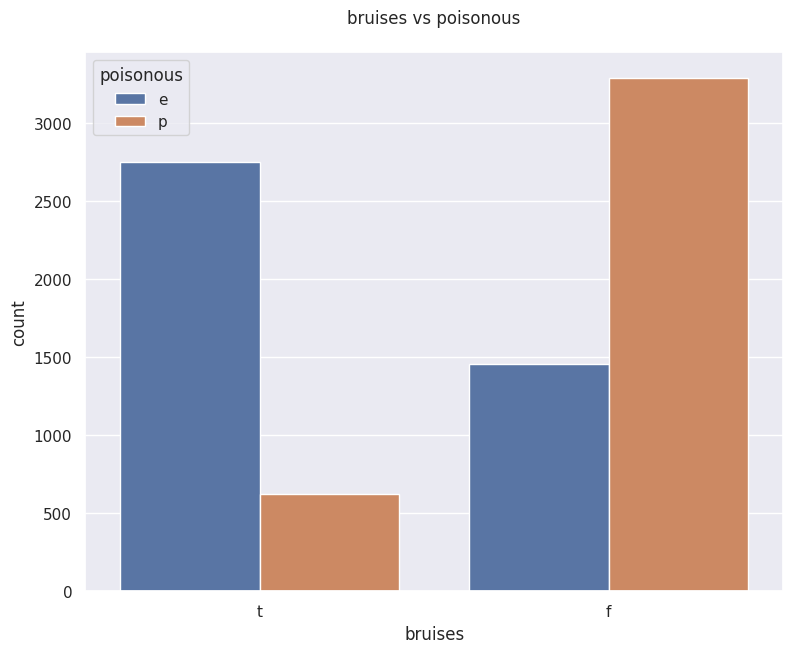

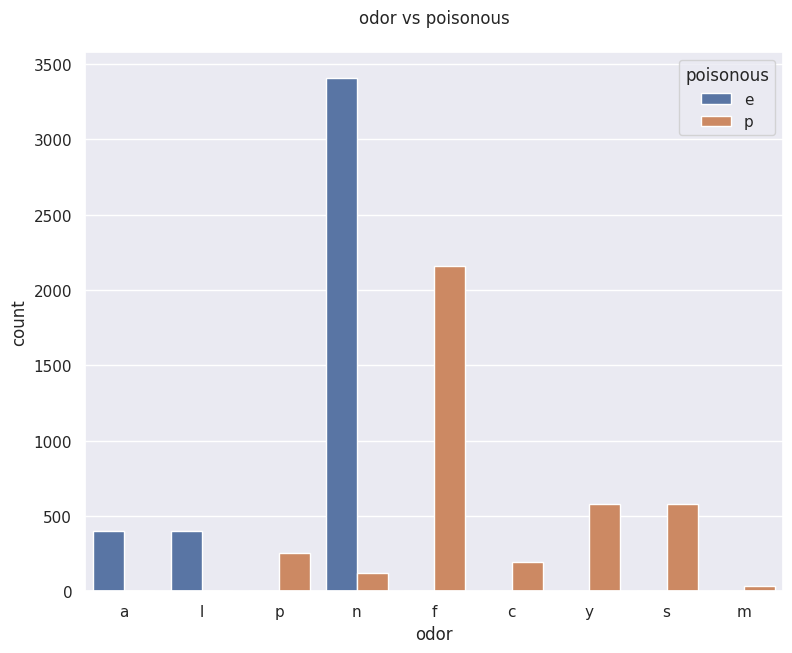

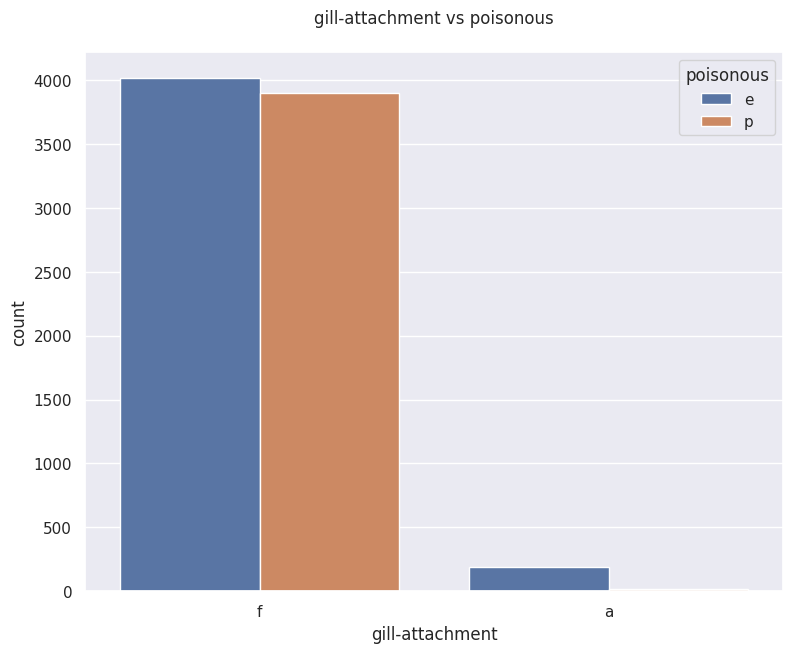

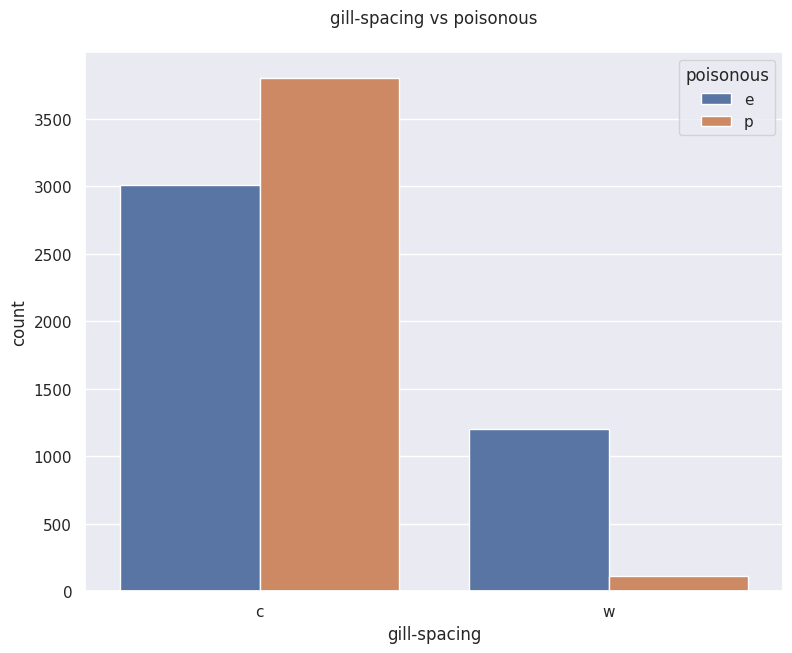

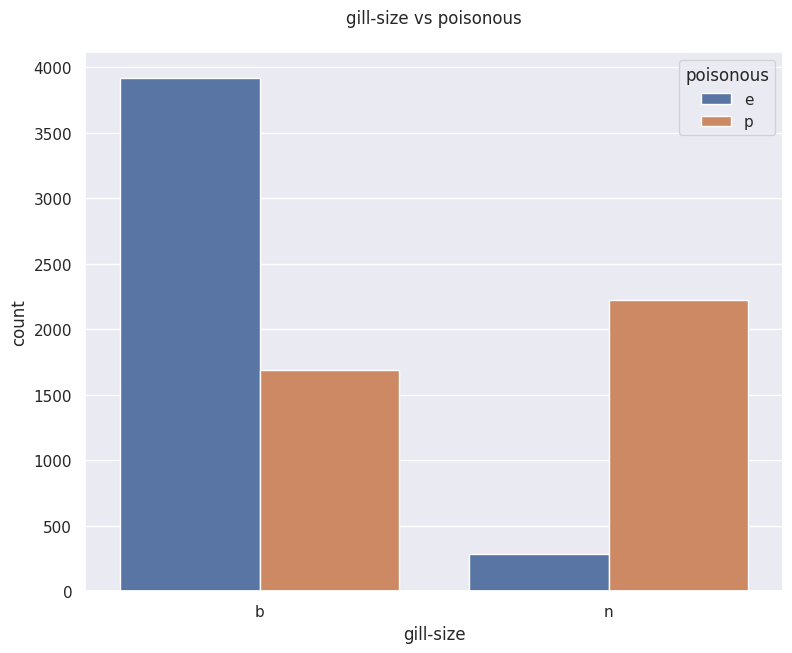

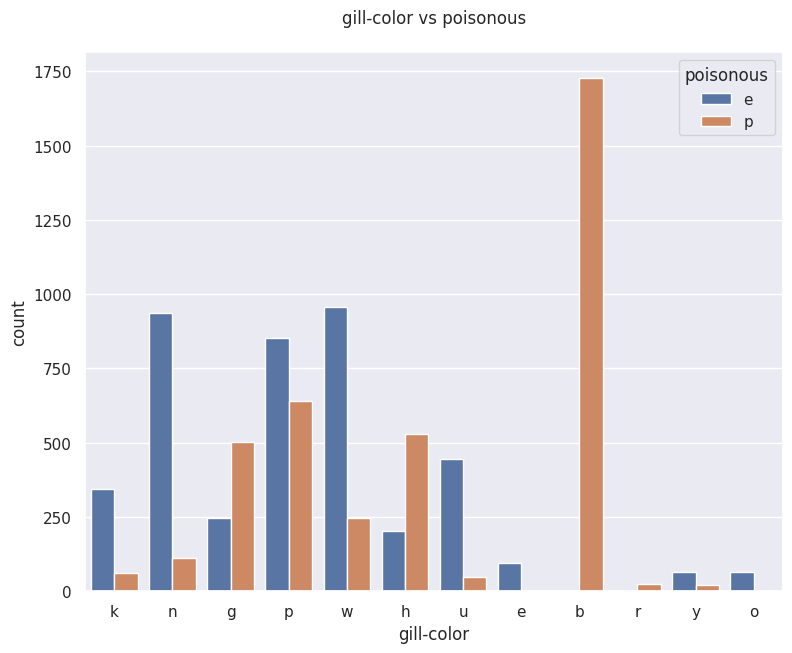

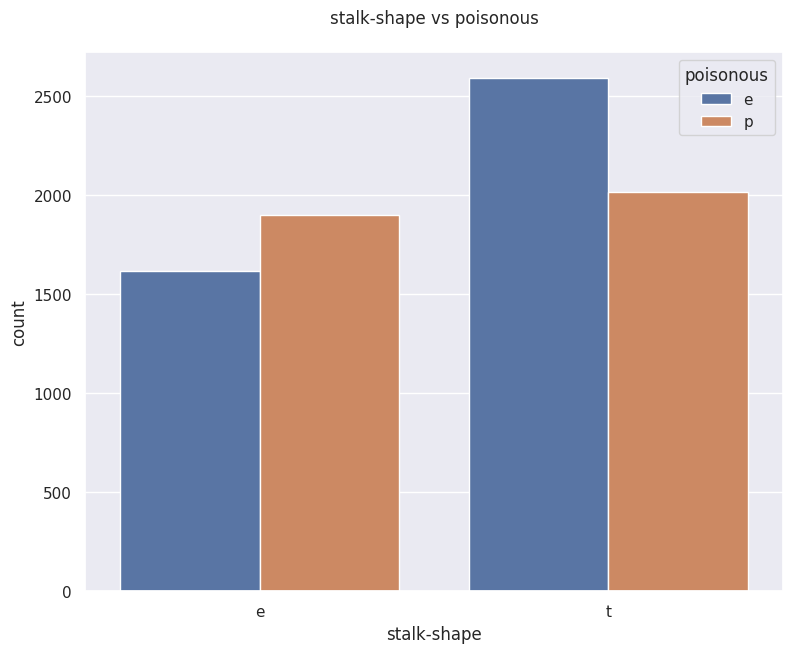

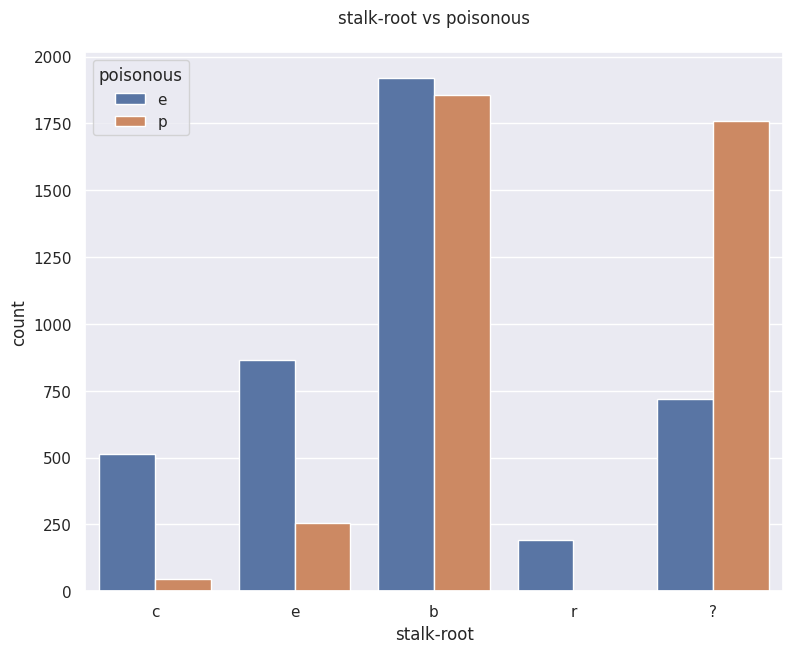

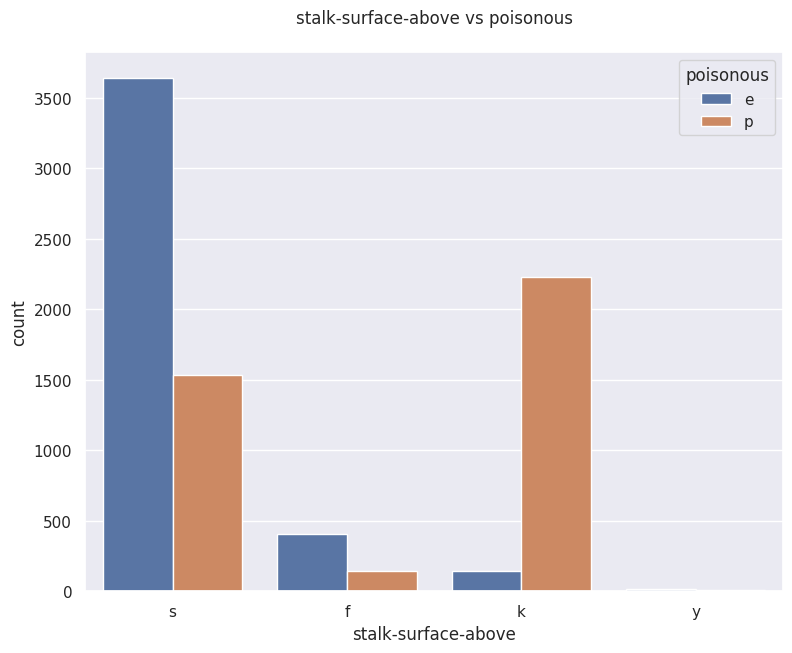

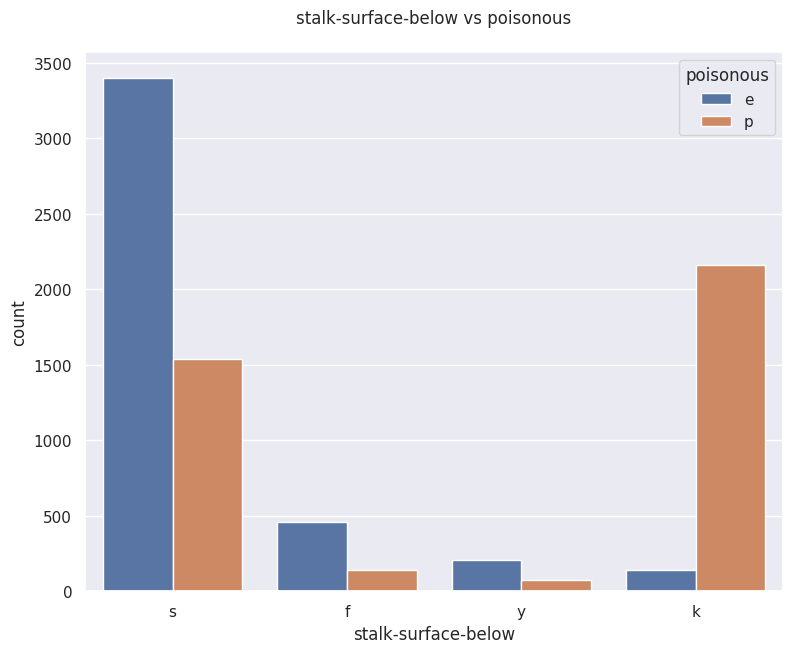

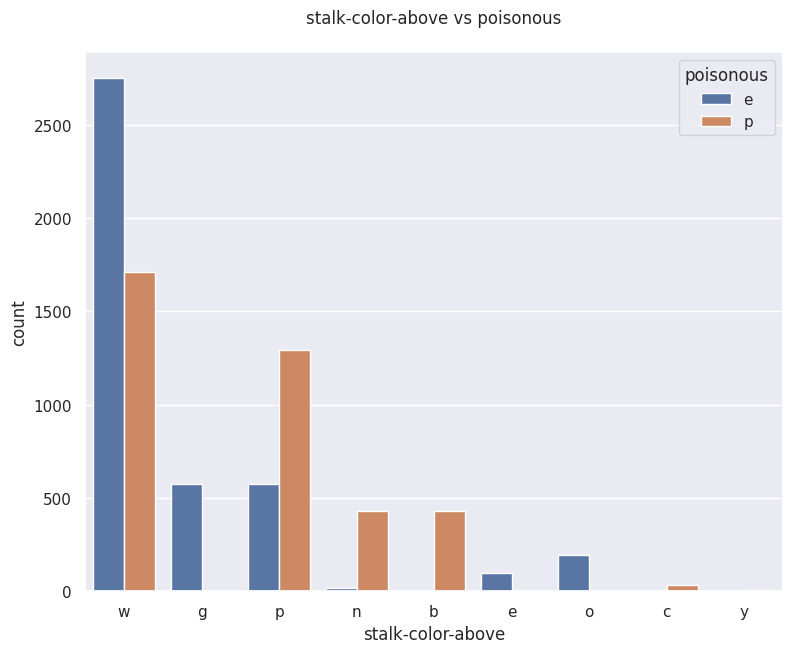

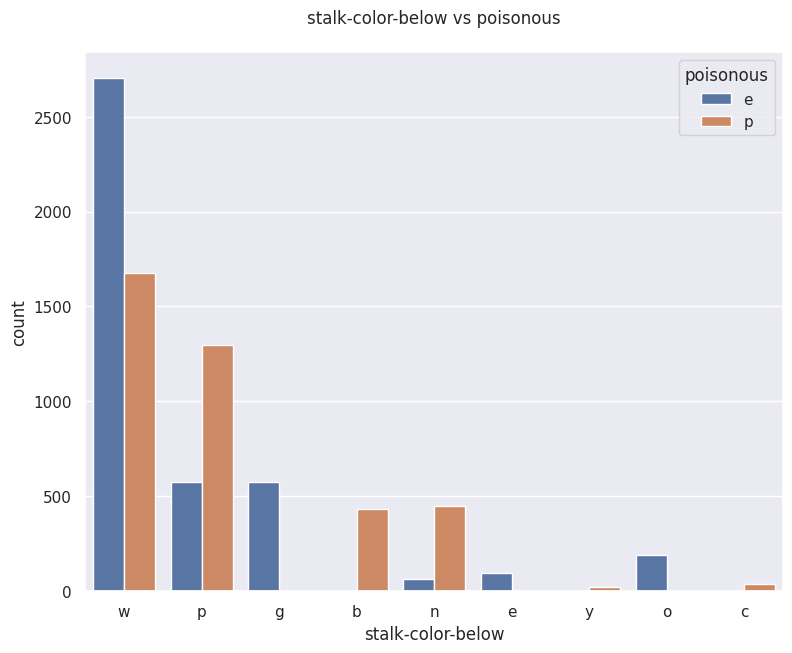

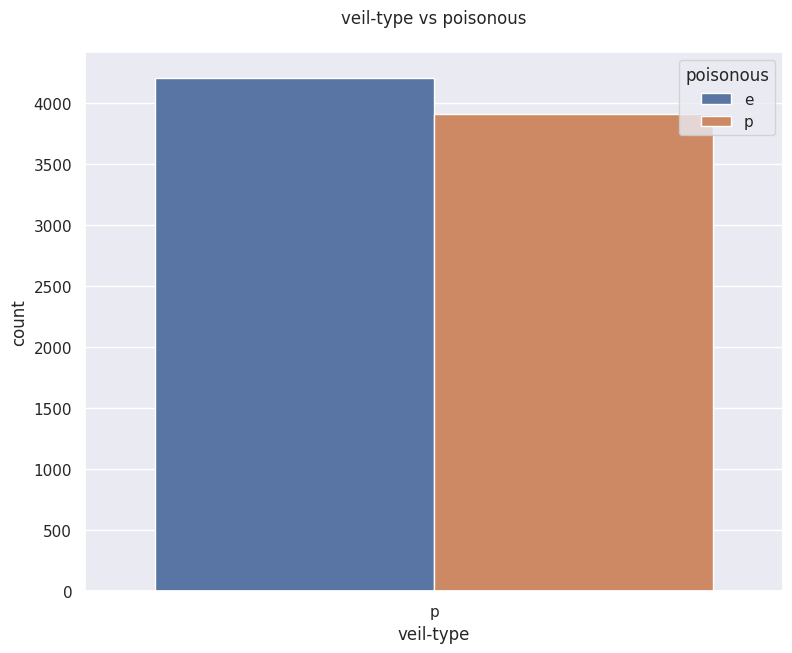

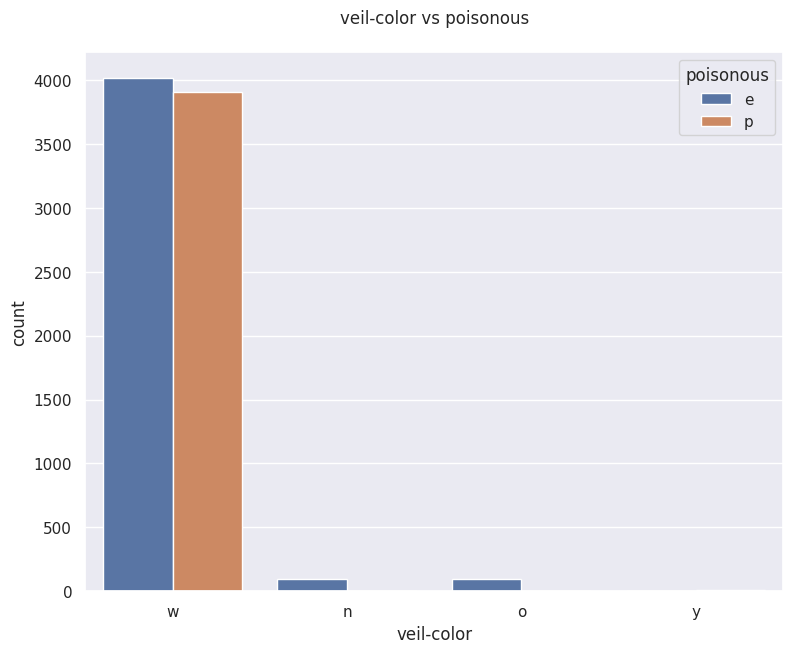

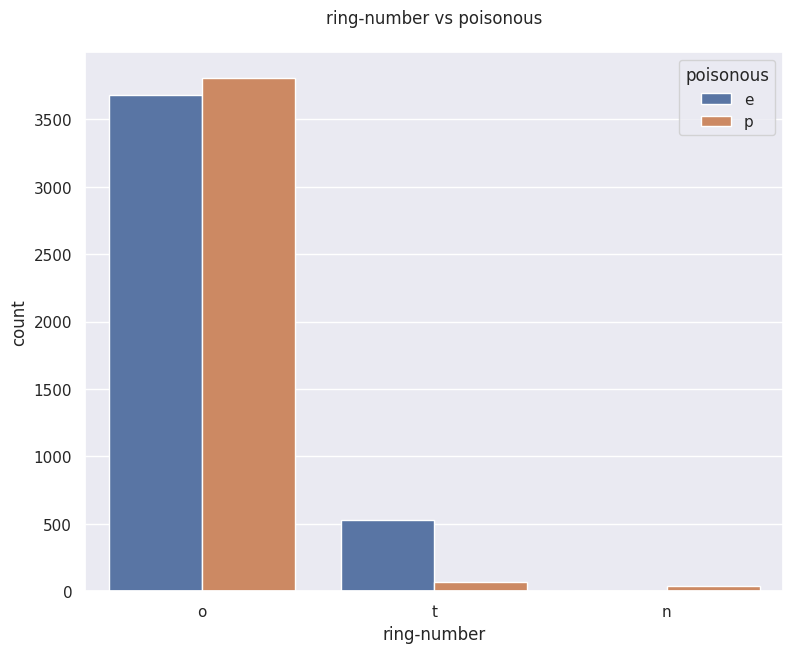

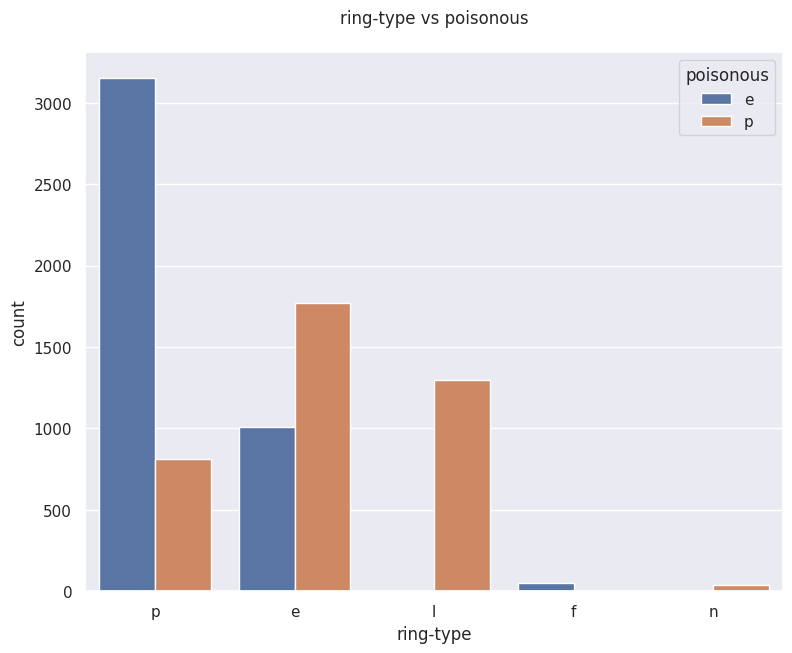

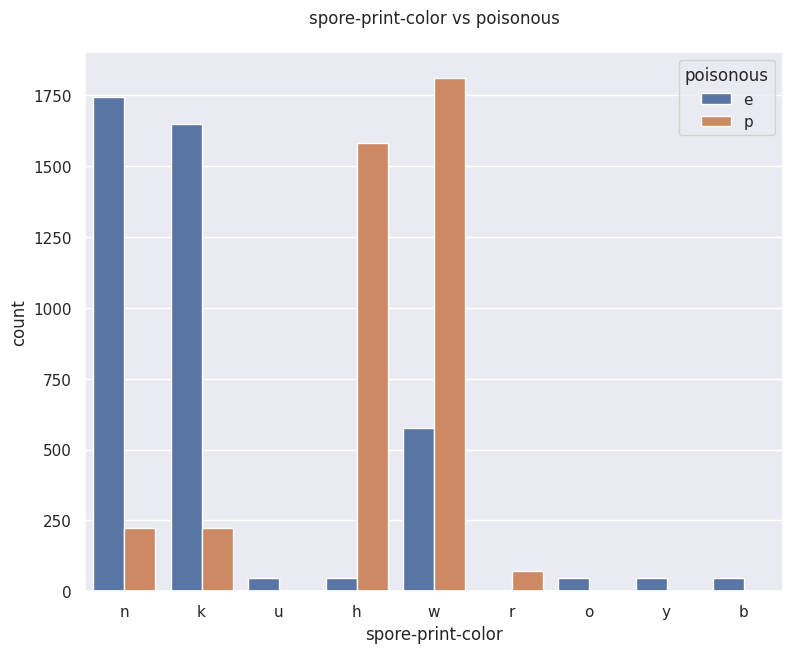

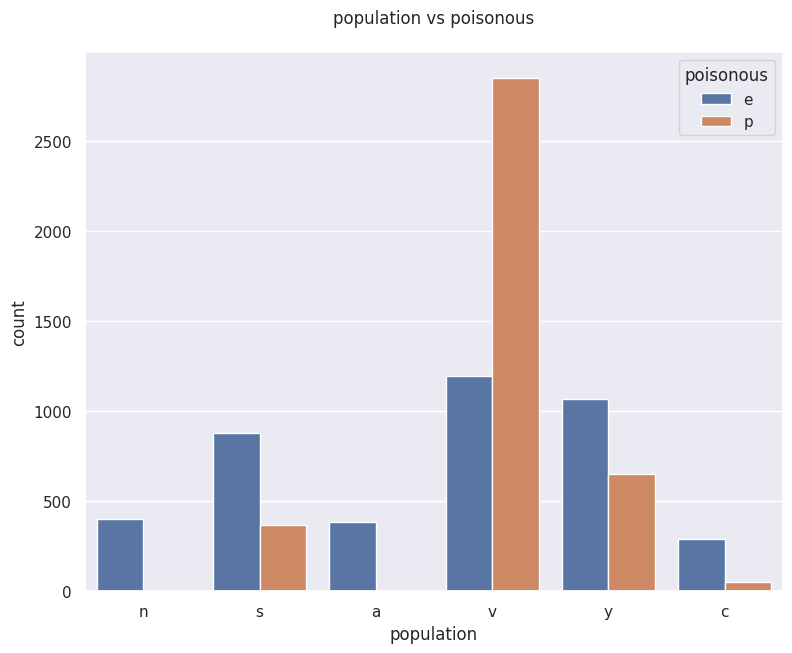

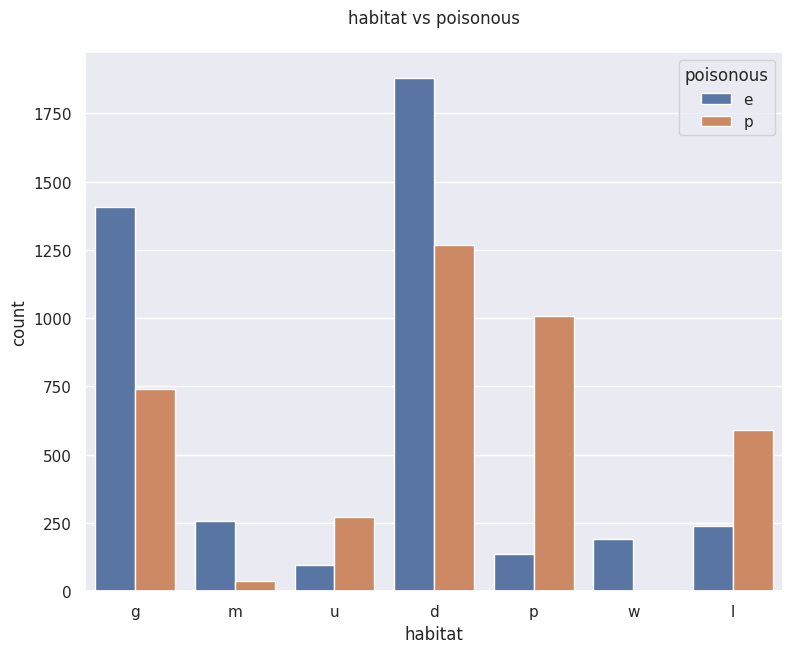

In [ ]:
feature_columns = [col for col in df.columns if col != 'poisonous'] # Excludes the poisonous variable from the columns to loop through

sns.set(rc={'figure.figsize': (9, 7)}) # Sets the size of the graphs

for col in feature_columns: # Loops through each column and creates a bar chart for each
    sns.countplot(data=df, x=col, hue='poisonous')
    plt.title(f'{col} vs poisonous\n') # Sets the title of each graph to the feature name in question
    plt.show()
    print("\n\n") # Gives us some room between each graph

The graphs show a few features that may be redundant, such as "veil-color" in which almost all of the mushrooms fall into one category. The "Gill-attachment" feature has the same problem. The "spore-print-color" feature is anopother one to look out for, it shows that most of the edible mushrooms fall into one of two categories (n, k). This is also the case with the poisonous mushrooms (h, w). The 'Odor' table gives us similar information and shows that the poisonous and edible mushrooms fall into distinct categories.

# **DATA PRE-PROCESSING:**

In [ ]:
df = df.drop(['stalk-root', 'gill-attachment', 'spore-print-color', 'veil-type', 'odor'], axis=1) # drop these features from the dataframe
df.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above,stalk-surface-below,stalk-color-above,stalk-color-below,veil-color,ring-number,ring-type,population,habitat
0,e,x,s,y,t,c,b,k,e,s,s,w,w,w,o,p,n,g
1,e,b,s,w,t,c,b,n,e,s,s,w,w,w,o,p,n,m
2,p,x,y,w,t,c,n,n,e,s,s,w,w,w,o,p,s,u
3,e,x,s,g,f,w,b,k,t,s,s,w,w,w,o,e,a,g
4,e,x,y,y,t,c,b,n,e,s,s,w,w,w,o,p,n,g


every single one of the columns/features hold categorical data. We will change this into numerical, dummy-data to make it easier to work with. We will leave the poisonous/target feature alone for now as it is already in the correct form.

In [ ]:
# for every column
for i in df.columns:
  #print this template
  print(f'a = pd.get_dummies(df[\'{i}\'], prefix = \"{i}\")')


#this section of code was to save time writing similar code out many times

a = pd.get_dummies(df['poisonous'], prefix = "poisonous")
a = pd.get_dummies(df['cap-shape'], prefix = "cap-shape")
a = pd.get_dummies(df['cap-surface'], prefix = "cap-surface")
a = pd.get_dummies(df['cap-color'], prefix = "cap-color")
a = pd.get_dummies(df['bruises'], prefix = "bruises")
a = pd.get_dummies(df['gill-spacing'], prefix = "gill-spacing")
a = pd.get_dummies(df['gill-size'], prefix = "gill-size")
a = pd.get_dummies(df['gill-color'], prefix = "gill-color")
a = pd.get_dummies(df['stalk-shape'], prefix = "stalk-shape")
a = pd.get_dummies(df['stalk-surface-above'], prefix = "stalk-surface-above")
a = pd.get_dummies(df['stalk-surface-below'], prefix = "stalk-surface-below")
a = pd.get_dummies(df['stalk-color-above'], prefix = "stalk-color-above")
a = pd.get_dummies(df['stalk-color-below'], prefix = "stalk-color-below")
a = pd.get_dummies(df['veil-color'], prefix = "veil-color")
a = pd.get_dummies(df['ring-number'], prefix = "ring-number")
a = pd.get_dummies(df['ring-type'], pref

this code makes data frames that represent the categorical data numerically;

In [ ]:
a = pd.get_dummies(df['cap-shape'], prefix = "cap-shape")
b = pd.get_dummies(df['cap-surface'], prefix = "cap-surface")
c = pd.get_dummies(df['cap-color'], prefix = "cap-color")
d = pd.get_dummies(df['bruises'], prefix = "bruises")
# e = pd.get_dummies(df['odor'], prefix = "odor") # dropped features have been commented out to prevent errors
# f = pd.get_dummies(df['gill-attachment'], prefix = "gill-attachment")
g = pd.get_dummies(df['gill-spacing'], prefix = "gill-spacing")
h = pd.get_dummies(df['gill-size'], prefix = "gill-size")
i = pd.get_dummies(df['gill-color'], prefix = "gill-color")
j = pd.get_dummies(df['stalk-shape'], prefix = "stalk-shape")
# k = pd.get_dummies(df['stalk-root'], prefix = "stalk-root")
l = pd.get_dummies(df['stalk-surface-above'], prefix = "stalk-surface-above")
m = pd.get_dummies(df['stalk-surface-below'], prefix = "stalk-surface-below")
n = pd.get_dummies(df['stalk-color-above'], prefix = "stalk-color-above")
o = pd.get_dummies(df['stalk-color-below'], prefix = "stalk-color-below")
# p = pd.get_dummies(df['veil-type'], prefix = "veil-type")
q = pd.get_dummies(df['veil-color'], prefix = "veil-color")
r = pd.get_dummies(df['ring-number'], prefix = "ring-number")
s = pd.get_dummies(df['ring-type'], prefix = "ring-type")
# t = pd.get_dummies(df['spore-print-color'], prefix = "spore-print-color")
u = pd.get_dummies(df['population'], prefix = "population")
v = pd.get_dummies(df['habitat'], prefix = "habitat")

In [ ]:
print(type(j)) #check typpe
j.head() #view the first few rows of the new dataframes

<class 'pandas.core.frame.DataFrame'>


,stalk-shape_e,stalk-shape_t
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0


In [ ]:
#add categorical variables to array so they can all be easily dropped and chanegd for new dataframes;
cat_variables = []
for x in df.columns: #loop through column names
  if(x != "poisonous"): #leave out poisonous column
    cat_variables.append(x) #add columns to array

print(cat_variables)
print(len(cat_variables)) # prints length of array


['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-surface-above', 'stalk-surface-below', 'stalk-color-above', 'stalk-color-below', 'veil-color', 'ring-number', 'ring-type', 'population', 'habitat']
17


In [ ]:
df = df.drop(cat_variables, axis = 1) # removes the categorical features from our dataframe

In [ ]:
print(type(i))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
df_tmp = [df, a, b, c, d, g, h, i, j, l, m, n, o, q, r, s, u, v] # combines all our dummy data frames into one array
df = pd.concat(df_tmp, axis=1) #combines the dataframes together

df.head()


,poisonous,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,e,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,e,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,p,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,e,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,e,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# **MODELLING / CLASSIFICATION;**

In [ ]:
X = df.drop('poisonous', axis = 1) # store the input features into X variable

y = df['poisonous'] # store the label column into y variable

# display types of X and y;

print(type(X))
print(type(y))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2) # here we split the data into training and testing sections to help predict and evaluate how the model is performing. To start, the data has been split into a standard 80/20% training/testing.

as all the data is categorical and has been converted to dummy variables, no pre-processing is required as the data is in the (0, 1) state already.

In [ ]:
from sklearn.linear_model import LogisticRegression # to start with, Logistic regression is used as it is simple and effective for classiofication problems like this one.

lg_model = LogisticRegression(solver='lbfgs', max_iter=3000) # the max iterations is used to set the number of optimisations carried out on the model. The solver refers to the specific algorithm used.
lg_model.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [ ]:
y_pred = lg_model.predict(X_test) # this uses the testing data to predict target (poisonous) values

actual = y_test # this gives us the actual values to compare to

In order to compare the predictewd and actual values, a data duictionary and data frame can be used. This will show the specific places where the algorithm was right and wrong;

In [ ]:
dic = {'Actual':actual,
       'Prediction':y_pred,
       'correct_prediction':0 # this sets all correct predictions in our dataframe to 0. they will be updated below.
       }

result = pd.DataFrame(dic)

In [ ]:
def updatePredictions(x,y):
  if x==y:
    return 1
  else:
    return 0

result['correct_prediction'] = result.apply(lambda x: updatePredictions(x.Actual, x.Prediction), axis=1) # this uses the above function to update our result dataframe predictions to their actual values.

It is now possibole to see where the model predicted succefully as well as incorrectly;

In [ ]:
result[result.correct_prediction==1] # displays the correct predictions;

,Actual,Prediction,correct_prediction
4844,p,p,1
6521,p,p,1
3070,e,e,1
3418,e,e,1
1006,e,e,1
...,...,...,...
21,e,e,1
5125,p,p,1
451,e,e,1
1688,e,e,1


In [ ]:
result[result.correct_prediction==0] # displays saome of the incorrect predictions

,Actual,Prediction,correct_prediction
1935,e,p,0
5839,p,e,0
5216,p,e,0
3462,p,e,0
481,e,p,0
5980,p,e,0
817,e,p,0
5554,p,e,0
765,e,p,0
3844,p,e,0


Here, the overall accuracy is manually predicted to give an indication on how well the model is working.

In [ ]:
print(f'the accuracy on the test Data is {len(result[result.correct_prediction==1])/len(result)}')

the accuracy on the test Data is 0.9858461538461538


It is possible to compare this calculated score with one the sklearn.metrics library can calculate for us;

In [ ]:
from sklearn.metrics import accuracy_score
print(f'the accuracy on the test data is {round(accuracy_score(y_test,y_pred),2)}')

the accuracy on the test data is 0.99


more important metrics can be produced using the classification_report module. These include precision, recall and f1 score:

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           e       0.99      0.99      0.99       818
           p       0.99      0.99      0.99       807

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



A good way to visualise the models performance is by using a confusion matrix and heat map. This will clearly show where the model is performing well, as well as going wrong;

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred)) # this creates a confusion matrix that shows the kinds of predictions being made;

[[807  11]
 [ 12 795]]


(0.0, 2.0)

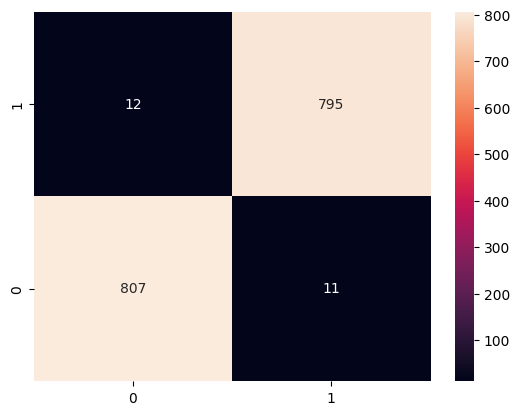

In [ ]:
ax = sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d")
ax.set_ylim([0,2])


This shows that the True positive value is 795 and the true negative value is 807. These are the values that were correctly predicted, wether that be edible or poisonous.
The matrix also shows that there were 12 false posotives and 11 false negatives.
This is farily even and overall a low proportion of the preduictions but it could be beneficial in this case if we could reduce the number of false negatives even further (poisonous mushrooms being identified as edible) as this could be dangerous in real world use.

All of the results suggest that the model is performing exceptionally well. very high accurtacy and precision scores point to this, however this is possibly due to highly corrolating features. It is possible to check this as will be shown in the next section.

# **SOLUTION IMPOVEMENT**

As our performance is so high, illiminating features that highly corrolate to the poisonous/target feature may help to make a more practical model. Allthough this may make the model slightly less accurate overall, it means that if in real world use, a new mushroom is needing predicted for poisonous or edible, we can do this accurately, even if some data is missing. It is good practice to also drop other highly corrolating features to help the model perform with new data.
Our model uses Logistic regression, which is simple and effective but it is a good idea to compare this to another model to see which may be more effective.

First, a comparison to another model will give some more insight. In this case, the Support Vector Machines algorithm is used. SVMs are different in key ways to logistic regression. For example, instead of predicting the probability of an instance belonging to a particular cateegory like logistic regression does, SVMs try to find a linear or non linear hyperplane that best separates the data into categfories with a large margin.

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='linear', class_weight='balanced', max_iter=3000, probability=True) # here we quickly set up a basic SVM model

svc.fit(X, y) #we fit the same X and y variables as before

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(class_weight='balanced', kernel='linear', max_iter=3000, probability=True)

In [ ]:
y_pred_svc = svc.predict(X_test) # this uses the testing data to predict target (poisonous) values

actual = y_test # this gives us the actual values to compare to

In [ ]:
dic_svc = {'Actual':actual,
       'Prediction':y_pred_svc,
       'correct_prediction':0 # this sets all correct predictions in our dataframe to 0. they will be updated below.
       }

result_svc = pd.DataFrame(dic_svc)

In [ ]:
def updatePredictions(x,y): # the same methods as before are used for consistency.
  if x==y:
    return 1
  else:
    return 0

result_svc['correct_prediction'] = result_svc.apply(lambda x: updatePredictions(x.Actual, x.Prediction), axis=1)

In [ ]:
result_svc[result_svc.correct_prediction==0] # shows the incorrect predictions

,Actual,Prediction,correct_prediction
1935,e,p,0
5216,p,e,0
3462,p,e,0
481,e,p,0
5980,p,e,0
255,e,p,0
817,e,p,0
5554,p,e,0
463,e,p,0
765,e,p,0


In [ ]:
print(f'the accuracy on the test Data is {len(result_svc[result_svc.correct_prediction==1])/len(result_svc)}')

the accuracy on the test Data is 0.9870769230769231


This shows that with the same input as the previous linear regression model, the SVM model imporves the accuracy by a small amount.

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize

y_probs = svc.predict_proba(X_test)[:, 1]
y_true_binary = label_binarize(y_test, classes=['e', 'p'])
fpr, tpr, thresholds = roc_curve(y_true_binary, y_probs)


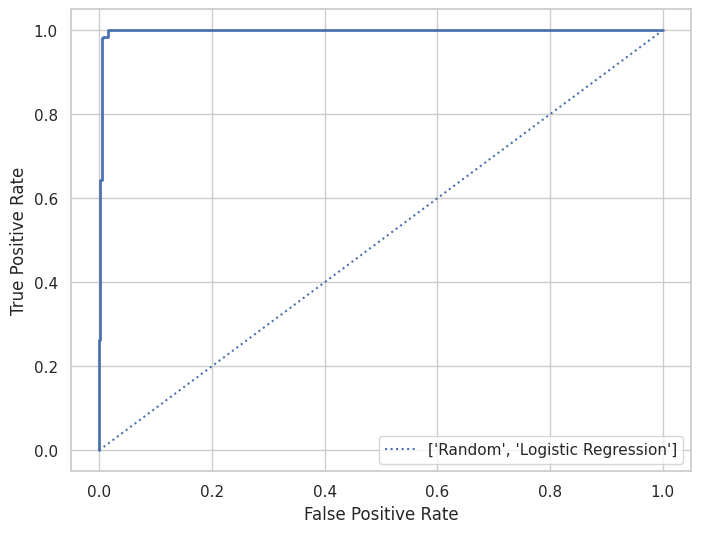

In [ ]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1],[0,1],'b:',label=['Random','Logistic Regression'])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show() # in this section, we ceate a graph to demonstaracte the effectiveness of the SVM algorithm.


The graph shows just how well the Algorithm works. the closer the curve reaches to the top left corner, generally the better the algorithm performs.